In [6]:
import numpy as np
import pandas as pd
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import time

In [7]:
client_id = 'xxx'
client_secret = 'xxx'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [50]:
songs = pd.read_csv('500k_playlists.csv')
# songs.rename(columns={'Unnamed: 0': 'pid'}, inplace=True)
songs.head()

,Unnamed: 0,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pidfile_name
0,0,0,Sleeping At Last,spotify:track:2d7LPtieXdIYzf7yHPooWd,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Chasing Cars,spotify:album:0UIIvTTWNB3gRQWFoxoEDh,242564,"Covers, Vol. 2",0songs284
1,1,1,Rachael Yamagata,spotify:track:0y4TKcc7p2H6P0GJlt01EI,spotify:artist:7w0qj2HiAPIeUcoPogvOZ6,Elephants,spotify:album:6KzK9fDNmj7GHFbcE4gVJD,253701,Elephants...Teeth Sinking Into Heart,0songs284
2,2,2,The Cinematic Orchestra,spotify:track:6q4c1vPRZREh7nw3wG7Ixz,spotify:artist:32ogthv0BdaSMPml02X9YB,That Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,103920,Ma Fleur,0songs284
3,3,3,The Cinematic Orchestra,spotify:track:54KFQB6N4pn926IUUYZGzK,spotify:artist:32ogthv0BdaSMPml02X9YB,To Build A Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,371320,Ma Fleur,0songs284
4,4,4,Leon Bridges,spotify:track:0NeJjNlprGfZpeX2LQuN6c,spotify:artist:3qnGvpP8Yth1AqSBMqON5x,River,spotify:album:4svLfrPPk2npPVuI4kXPYg,238560,Coming Home,0songs284


In [51]:
track_uris = []
song_data = songs['track_uri'].values

for i in song_data:
    track_uris.append(i)

In [52]:
print(len(track_uris))
track_uris[:5]

33143261


['spotify:track:2d7LPtieXdIYzf7yHPooWd',
 'spotify:track:0y4TKcc7p2H6P0GJlt01EI',
 'spotify:track:6q4c1vPRZREh7nw3wG7Ixz',
 'spotify:track:54KFQB6N4pn926IUUYZGzK',
 'spotify:track:0NeJjNlprGfZpeX2LQuN6c']

In [113]:
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data4
# import pandas as pd
# import time
# import random

# client_id = '21b6b51f18724632aaf2866d82b05f4d'
# client_secret = 'f3d6679bbddd43aba5800493e373f804'
# client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
# sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
# sp.trace=False

# #your uri list goes here
# # s_list = ['spotify:track:2d7LPtieXdIYzf7yHPooWd','spotify:track:0y4TKcc7p2H6P0GJlt01EI','spotify:track:6q4c1vPRZREh7nw3wG7Ixz','spotify:track:54KFQB6N4pn926IUUYZGzK','spotify:track:0NeJjNlprGfZpeX2LQuN6c']
# s_list = track_uris[:10000]
    
# #put uri to dataframe
# df = pd.DataFrame(s_list)
# df.columns = ['URI']

# df['energy'] = ''*df.shape[0]
# df['loudness'] = ''*df.shape[0]
# df['speechiness'] = ''*df.shape[0]
# df['valence'] = ''*df.shape[0]
# df['liveness'] = ''*df.shape[0]
# df['tempo'] = ''*df.shape[0]
# df['danceability'] = ''*df.shape[0]

# for i in range(0,df.shape[0]):
#     time.sleep(random.uniform(3, 6)) 
#     URI = df.URI[i]
#     features = sp.audio_features(URI)
#     df.loc[i,'energy'] = features[0]['energy']
#     df.loc[i,'speechiness'] = features[0]['speechiness']
#     df.loc[i,'liveness'] = features[0]['liveness']
#     df.loc[i,'loudness'] = features[0]['loudness']
#     df.loc[i,'danceability'] = features[0]['danceability']
#     df.loc[i,'tempo'] = features[0]['tempo']
#     df.loc[i,'valence'] = features[0]['valence']
#     uri=0

In [112]:
df.to_csv('10k_playlist_audio_features.csv')

In [118]:
k10_df = pd.read_csv('10k_playlist_audio_features.csv')
k10_df.dropna(axis=0, inplace=True)


In [205]:
eda_df = k10_df.copy()

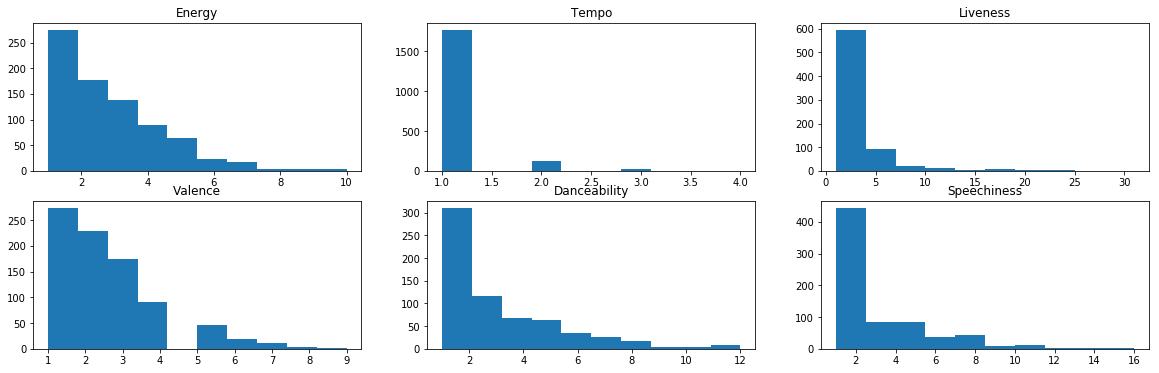

In [176]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,3, figsize=(20,6))
ax[0, 0].hist(eda_df.groupby(['energy']).count()['URI'])
ax[0,0].set_title('Energy')
ax[0, 1].hist(eda_df.groupby(['tempo']).count()['URI'])
ax[0,1].set_title('Tempo')
ax[1, 0].hist(eda_df.groupby(['valence']).count()['URI'])
ax[1,0].set_title('Valence')
ax[1, 1].hist(eda_df.groupby(['danceability']).count()['URI'])
ax[1,1].set_title('Danceability');
ax[1, 2].hist(eda_df.groupby(['speechiness']).count()['URI'])
ax[1,2].set_title('Speechiness');
ax[0, 2].hist(eda_df.groupby(['liveness']).count()['URI'])
ax[0,2].set_title('Liveness');

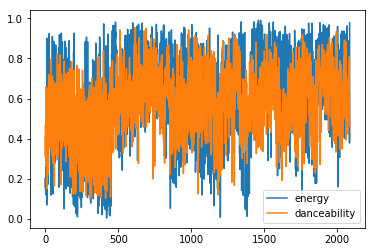

In [186]:
plt.plot(eda_df['energy'] , label='energy');
plt.plot(eda_df['danceability'], label='danceability')
plt.legend()
plt.show()

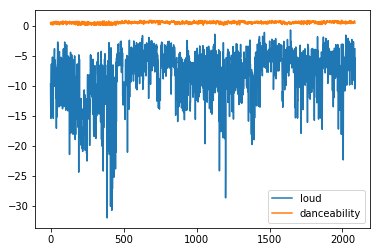

In [193]:
plt.plot(eda_df['loudness'] , label='loud');
plt.plot(eda_df['danceability'], label='danceability')
plt.legend()
plt.show()

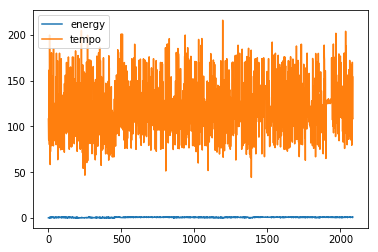

In [206]:
plt.plot(eda_df['energy'] , label='energy');
plt.plot(eda_df['tempo'], label='tempo')
plt.legend()
plt.show()

In [60]:
artist_names = []
artist_data = songs['artist_name'].values

for i in artist_data:
    artist_names.append(i)